# Beamline Optimization - Initialization
This notebook performs sequential optimization of the UH beamline using custom modules and beam parameters.

Add image of the all beamline elements and numbers associated

In [1]:
# Import Python modules
%matplotlib ipympl
import sys
import time
from pathlib import Path
import numpy as np
import pandas as pd
import sympy as sp
import sympy.plotting as plot

# Import Beam Dynamics modules
from ebeam import beam
from beamline import lattice, beamline
from schematic import draw_beamline
from excelElements import ExcelElements
from beamOptimizer import beamOptimizer
from AlgebraicOptimization import AlgebraicOpti

In [2]:
# Initial Beam Parameters
Energy = 40  # MeV
f = 2856e6  # Hz
bunch_spread = 2  # ps
energy_std_percent = 0.5
h = 5e9  # 1/s

epsilon_n = 8  # pi.mm.mrad
x_std = 0.8  # mm
y_std = 0.8  # mm
nb_particles = 1000

relat = lattice(1, E=Energy)
norm = relat.gamma * relat.beta
epsilon = epsilon_n / norm
x_prime_std = epsilon / x_std
y_prime_std = epsilon / y_std

tof_std = bunch_spread * 1e-9 * f
gen_tof = np.random.normal(0, tof_std, size=(nb_particles, 1))
energy_std = energy_std_percent * 10

ebeam = beam()
beam_dist = ebeam.gen_6d_gaussian(0, [x_std,x_prime_std,y_std,y_prime_std,tof_std,energy_std], nb_particles)
tof_dist = beam_dist[:,4] / f
beam_dist[:,5] += h * tof_dist


In [3]:
# Load Beamline from Excel
path = Path(r"C:\Users\NielsB\cernbox\Hawaii University\Beam dynamics\FELsim")
file_path = path / 'Beamline_elements.xlsx'
excel = ExcelElements(file_path)
df = excel.get_dataframe()
beamlineUH = excel.create_beamline()
schem = draw_beamline()
beamtype = beamline()
line_UH = beamtype.changeBeamType(beamlineUH, "electron", Energy)
print(len(line_UH))
# Optimizer and beamline truncation
segments = 98
line = line_UH[:segments]
opti = beamOptimizer(line, beam_dist)


98


In [4]:
# Optimization - First Quadrupole Doublet

line[1].current = 0.9989681933
line[3].current = 1.044851479

In [5]:
# Optimization - First Chromacity Quad

variables = {10: ["I", "current", lambda num:num]}
startPoint = {"I": {"bounds": (0,10), "start": 1}}
objectives = {15: [{"measure": ["x", "dispersion"], "goal": 0, "weight": 1}]}
result = opti.calc("Nelder-Mead", variables, startPoint, objectives, plotBeam=False, printResults=True, plotProgress=False)



x variables:
indice 10 new current value: 3.8354492187500058

y objectives:
indice 15: x disper value of -5.8892826446367266e-08
Final difference: 3.4683650068419355e-15

Total time: 73.3906445 s
Total iterations: 40



In [6]:
# Optimization - Quadrupole Triplet
line[16].current = 2.4
line[18].current = 5.108214683
line[20].current = 3.142089844

In [7]:
# Optimization - Second Chromacity Quad
variables = {27: ["I", "current", lambda num:num]}
startPoint = {"I": {"bounds": (0,10), "start": 1}}
objectives = {32: [{"measure": ["x", "dispersion"], "goal": 0, "weight": 1}]}
result = opti.calc("Nelder-Mead", variables, startPoint, objectives, plotBeam=False, printResults=True, plotProgress=False)


x variables:
indice 27 new current value: 4.6397460937500075

y objectives:
indice 32: x disper value of 6.634726709192385e-07
Final difference: 4.401959850567082e-13

Total time: 60.69941229999999 s
Total iterations: 40



In [8]:
# Optimization - Double Quadrupole Triplet
variables = {
    37: ["I", "current", lambda num:num],
    35: ["I2", "current", lambda num:num],
    33: ["I3", "current", lambda num:num],
}
startPoint = {
    "I": {"bounds": (0,10), "start": 2},
    "I2": {"bounds": (0, 10), "start": 2},
    "I3": {"bounds": (0, 10), "start": 2},
}
objectives = {
    37: [
        {"measure": ["x", "alpha"], "goal": 0, "weight": 1},
        {"measure": ["y", "alpha"], "goal": 0, "weight": 1},
        {"measure": ["x", "envelope"], "goal": 2.0, "weight": 1},
        {"measure": ["y", "envelope"], "goal": 2.0, "weight": 1}
    ]
}
result = opti.calc("Nelder-Mead", variables, startPoint, objectives, plotBeam=False, printResults=True, plotProgress=False)

line[43].current = line[33].current
line[41].current = line[35].current
line[39].current = line[37].current


x variables:
indice 37 new current value: 1.953932393287454
indice 35 new current value: 3.3897101258278775
indice 33 new current value: 1.3440116728657168

y objectives:
indice 37: x alpha value of 0.0025379768586916685
indice 37: y alpha value of 0.0007119763541557551
indice 37: x envelope value of 2.1211540824182302
indice 37: y envelope value of 1.6543290244196394
Final difference: 0.033543420820536435

Total time: 197.31207709999998 s
Total iterations: 130



In [9]:
# Optimization - Third Chromacity Quad
variables = {50: ["I", "current", lambda num:num]}
startPoint = {"I": {"bounds": (0,10), "start": 1}}
objectives = {55: [{"measure": ["x", "dispersion"], "goal": 0, "weight": 1}]}
result = opti.calc("Nelder-Mead", variables, startPoint, objectives, plotBeam=False, printResults=True, plotProgress=False)



x variables:
indice 50 new current value: 4.6631835937500075

y objectives:
indice 55: x disper value of -3.152311658426242e-07
Final difference: 9.937068791850003e-14

Total time: 60.35541690000002 s
Total iterations: 40



In [10]:
# Optimization - Double Quadrupole Doublet and Interaction Point (z = 7.11 m)
variables = {
    56: ["I", "current", lambda num:num],
    58: ["I2", "current", lambda num:num],
}
startPoint = {
    "I": {"bounds": (0,10), "start": 2},
    "I2": {"bounds": (0, 10), "start": 2},
}
objectives = {
    60: [
        {"measure": ["x", "alpha"], "goal": 0, "weight": 1},
        {"measure": ["y", "alpha"], "goal": 0, "weight": 1},
        {"measure": ["x", "envelope"], "goal": 2.0, "weight": 1},
        {"measure": ["y", "envelope"], "goal": 2.0, "weight": 1}
    ]
}
result = opti.calc("Nelder-Mead", variables, startPoint, objectives, plotBeam=False, printResults=True, plotProgress=False)

line[61].current = line[58].current
line[63].current = line[58].current


x variables:
indice 56 new current value: 2.3453637985558666
indice 58 new current value: 1.9626669093612907

y objectives:
indice 60: x alpha value of 0.020769942035072347
indice 60: y alpha value of -0.11007237983327389
indice 60: x envelope value of 3.0214184043044225
indice 60: y envelope value of 0.9183627279085635
Final difference: 0.5564454985049668

Total time: 104.98044829999998 s
Total iterations: 68



In [11]:
# Optimization - Fourth Chromacity Quad
variables = {70: ["I", "current", lambda num:num]}
startPoint = {"I": {"bounds": (0,10), "start": 1}}
objectives = {75: [{"measure": ["x", "dispersion"], "goal": 0, "weight": 1}]}
result = opti.calc("Nelder-Mead", variables, startPoint, objectives, plotBeam=False, printResults=True, plotProgress=False)



x variables:
indice 70 new current value: 4.675292968750007

y objectives:
indice 75: x disper value of 4.827247909073836e-07
Final difference: 2.3302322375657724e-13

Total time: 61.515459799999974 s
Total iterations: 40




x variables:
indice 76 new current value: 0.0
indice 78 new current value: 4.4853331334446445
indice 80 new current value: 2.0516460320791268

y objectives:
indice 81: x alpha value of 0.16835423412823167
indice 81: x envelope value of 0.06198681152874179
Final difference: 0.009768188879533284

Total time: 980.5519855999996 s
Total iterations: 600



Simulating Beamline: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 264/264 [00:04<00:00]


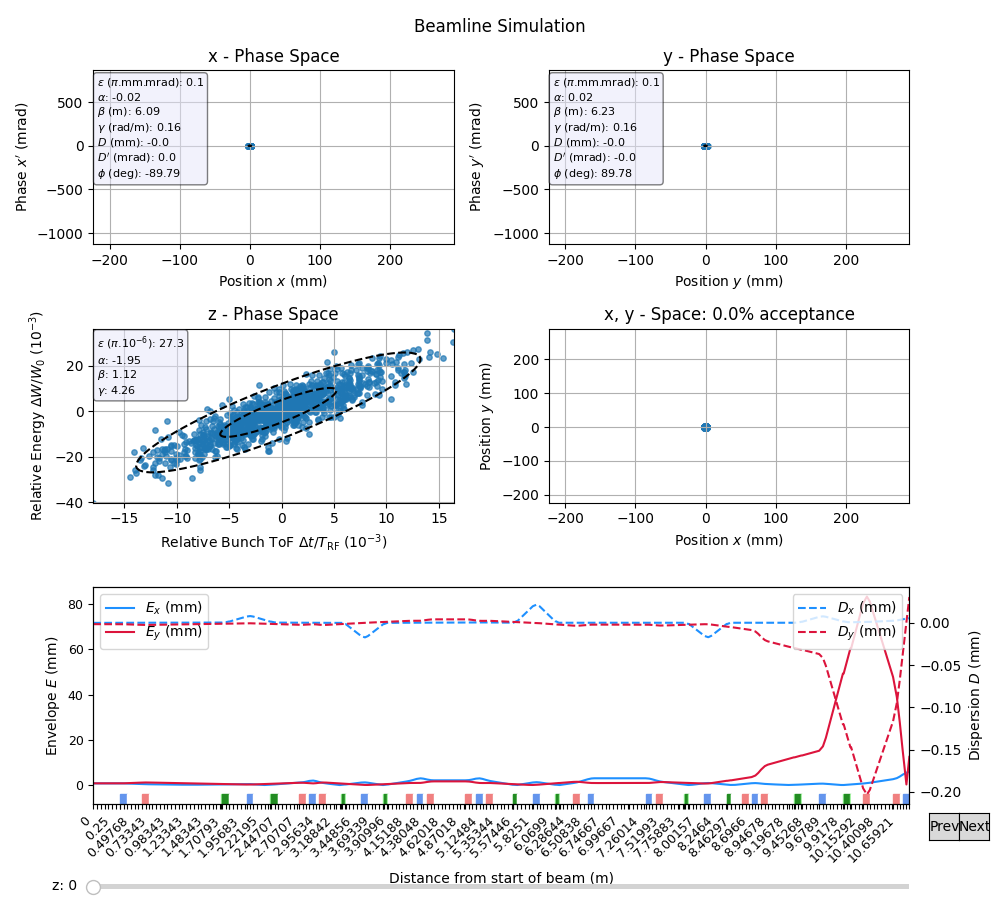

In [13]:
# Optimization - Quadrupole Triplet
variables = {
    76: ["I", "current", lambda num:num],
    78: ["I2", "current", lambda num:num],
    80: ["I3", "current", lambda num:num],
}
startPoint = {
    "I": {"bounds": (0,10), "start": 2},
    "I2": {"bounds": (0, 10), "start": 2},
    "I3": {"bounds": (0, 10), "start": 2},
}
objectives = {
    81: [
        {"measure": ["x", "alpha"], "goal": 0, "weight": 1},
        {"measure": ["x", "envelope"], "goal": 0.2, "weight": 1},
    ]
}
result = opti.calc("Nelder-Mead", variables, startPoint, objectives, plotBeam=True, printResults=True, plotProgress=False)

In [14]:
# Optimization - Fifth Chromacity Quad
variables = {87: ["I", "current", lambda num:num]}
startPoint = {"I": {"bounds": (0,10), "start": 1}}
objectives = {92: [{"measure": ["x", "dispersion"], "goal": 0, "weight": 1}]}
result = opti.calc("Nelder-Mead", variables, startPoint, objectives, plotBeam=False, printResults=True, plotProgress=False)


x variables:
indice 87 new current value: 3.9498046875000066

y objectives:
indice 92: x disper value of 4.67335319328857e-07
Final difference: 1.7545537833151227e-14

Total time: 105.92793250000022 s
Total iterations: 40



Simulating Beamline:  98%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████    | 1111/1131 [00:07<00:00]


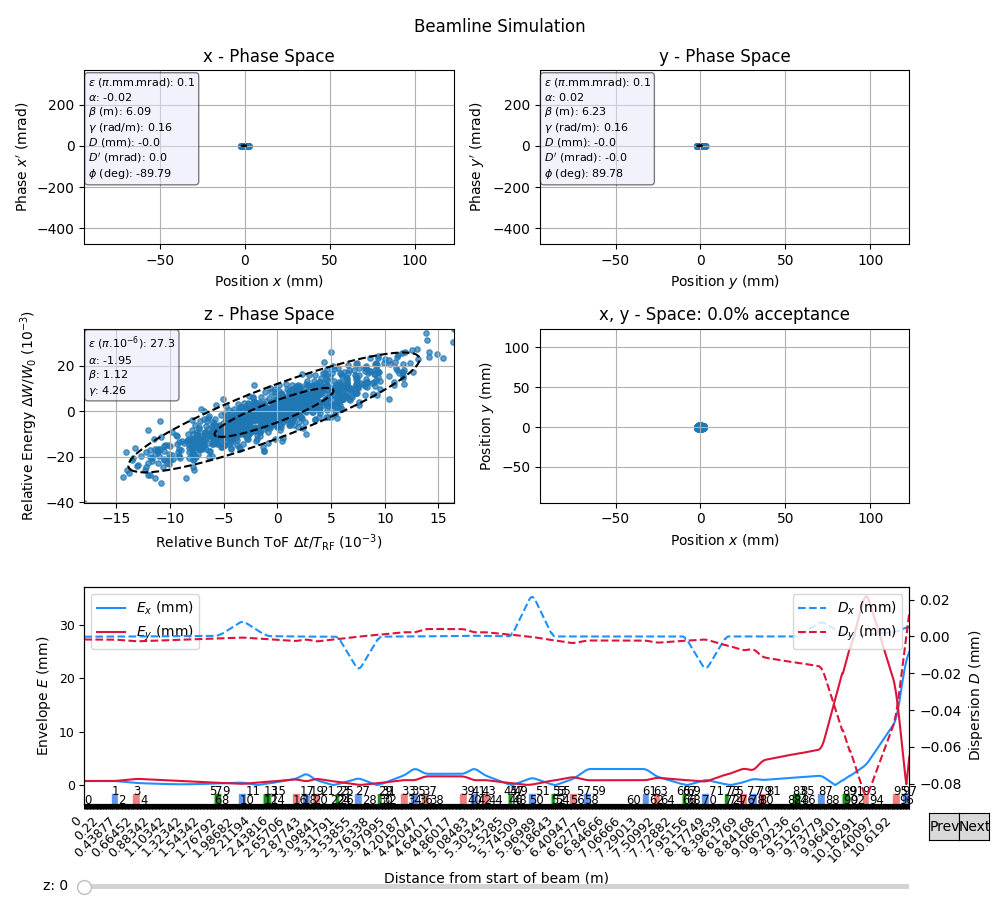

,$\epsilon$ ($\pi$.mm.mrad),$\alpha$,$\beta$ (m),$\gamma$ (rad/m),$D$ (mm),$D^{\prime}$ (mrad),$\phi$ (deg)
x,"[0.09812486920017433, 0.09812486920017431, 0.0...","[-0.022010558744591693, -0.023652336857463103,...","[6.093907921250397, 6.094364550206418, 6.09485...","[0.16417781128713899, 0.164177811287139, 0.164...","[-0.0001358703417991179, -0.000134581187027762...","[0.0001289154771356184, 0.0001289154771356184,...","[-89.78732776528207, -89.77148268775672, -89.7..."
y,"[0.0974240169990215, 0.0974240169990215, 0.097...","[0.02364068253911771, 0.022034401497326724, 0....","[6.229039973946935, 6.22858322310657, 6.228158...","[0.16062810417909817, 0.16062810417909817, 0.1...","[-0.0016552038724279058, -0.001656631620653157...","[-0.00014277482252498535, -0.00014277482252498...","[89.77679762753658, 89.79194704153853, 89.8070..."
z,"[27.301401805466124, 27.301401805466135, 27.30...","[-1.9470001580696161, -1.9469363965017028, -1....","[1.1247920386046353, 1.124733746306128, 1.1246...","[4.259284784293429, 4.259284784293428, 4.25928...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-25.583759955882673, -25.583041452705032, -25..."


In [12]:
# Display Optimized Beamline
%matplotlib ipympl
schem.plotBeamPositionTransform(beam_dist, line, 0.01, showIndice=True)
